##  Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pmdarima
import matplotlib.pyplot as plt

## Importar dataframe

In [2]:
# 1) Ler base mensal pronta para modelagem
df = pd.read_parquet(
    "/home/usuario/Documentos/Escorpiao_series/Dados_processados/series_mensal_model_ready.parquet"
)

# 2) Checagens rápidas
print(df.shape)
print(df.dtypes)
df.head()

(62420, 7)
DATA           datetime64[ns]
NOME_MUNI              object
ANO                     int32
MES                     int32
POPULACAO             float64
CASOS                 float64
TAXA_MENSAL           float64
dtype: object


,DATA,NOME_MUNI,ANO,MES,POPULACAO,CASOS,TAXA_MENSAL
0,2014-01-01,ADAMANTINA,2014,1,35673.0,2.0,5.6
1,2014-02-01,ADAMANTINA,2014,2,35673.0,2.0,5.6
2,2014-03-01,ADAMANTINA,2014,3,35673.0,0.0,0.0
3,2014-04-01,ADAMANTINA,2014,4,35673.0,2.0,5.6
4,2014-05-01,ADAMANTINA,2014,5,35673.0,8.0,22.4


## Rodar piloto somente em um municipio

In [3]:
# Escolha um município para o piloto
municipio = 'ADAMANTINA'   # pode trocar depois

# Filtrar dados do município
df_mun = df[df['NOME_MUNI'] == municipio].copy()

# Ordenar por data
df_mun = df_mun.sort_values('DATA')

# Criar a série temporal (index datetime, valores = TAXA_MENSAL)
y = df_mun.set_index('DATA')['TAXA_MENSAL']

# Conferências
print(y.shape)
y.head(12), y.tail(12)


(108,)


(DATA
 2014-01-01     5.6
 2014-02-01     5.6
 2014-03-01     0.0
 2014-04-01     5.6
 2014-05-01    22.4
 2014-06-01    16.8
 2014-07-01     0.0
 2014-08-01    16.8
 2014-09-01    33.6
 2014-10-01    22.4
 2014-11-01    22.4
 2014-12-01    16.8
 Name: TAXA_MENSAL, dtype: float64,
 DATA
 2022-01-01    16.8
 2022-02-01    11.2
 2022-03-01    11.2
 2022-04-01    16.8
 2022-05-01    11.2
 2022-06-01    16.8
 2022-07-01    16.8
 2022-08-01    16.8
 2022-09-01    44.9
 2022-10-01    39.2
 2022-11-01    16.8
 2022-12-01    11.2
 Name: TAXA_MENSAL, dtype: float64)

In [4]:
from pmdarima import auto_arima

# Ajuste do modelo SARIMA automático
modelo = auto_arima(
    y,                  # série temporal
    seasonal=True,      # há sazonalidade
    m=12,               # período sazonal = 12 meses
    stepwise=True,      # busca mais rápida
    suppress_warnings=True,
    error_action='ignore',
    trace=True          # MOSTRA os modelos testados (didático)
)

# Resumo do modelo escolhido
modelo.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=910.745, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=931.448, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=921.635, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=906.701, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=929.449, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=904.948, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=906.716, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=908.188, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=904.069, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=905.861, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=905.844, Time=0.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=907.091, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=920.192, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=906.006, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -447.957
Date:                Sat, 20 Dec 2025   AIC                            901.914
Time:                        06:32:51   BIC                            909.932
Sample:                    01-01-2014   HQIC                           905.164
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5531      0.089     -6.220      0.000      -0.727      -0.379
ma.L2         -0.1935      0.086     -2.262      0.024      -0.361      -0.026
sigma2       251.7614     21.294     11.823      0.000     210.026     293.497
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               111.33
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.52   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

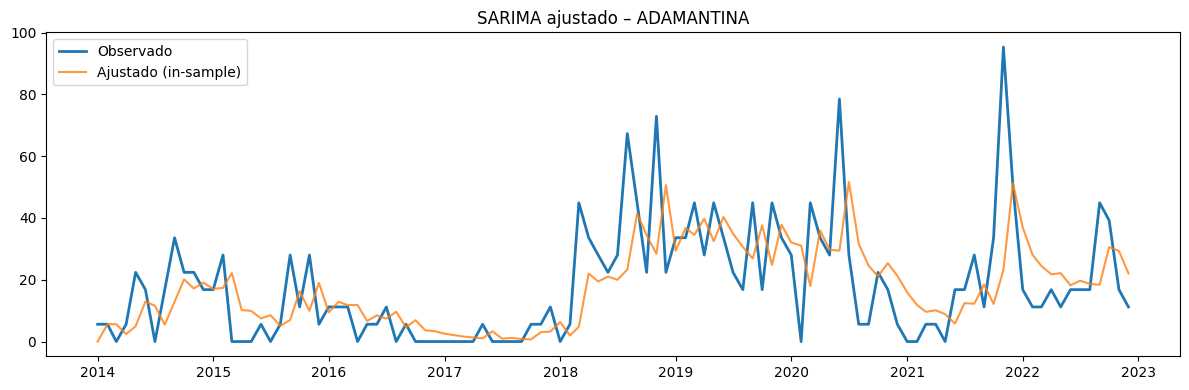

In [5]:
# Valores ajustados (in-sample)
y_fitted = pd.Series(modelo.predict_in_sample(), index=y.index)

# Gráfico: observado vs ajustado
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(y_fitted, label='Ajustado (in-sample)', alpha=0.8)
plt.title(f'SARIMA ajustado – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()


## Previsão no modelo

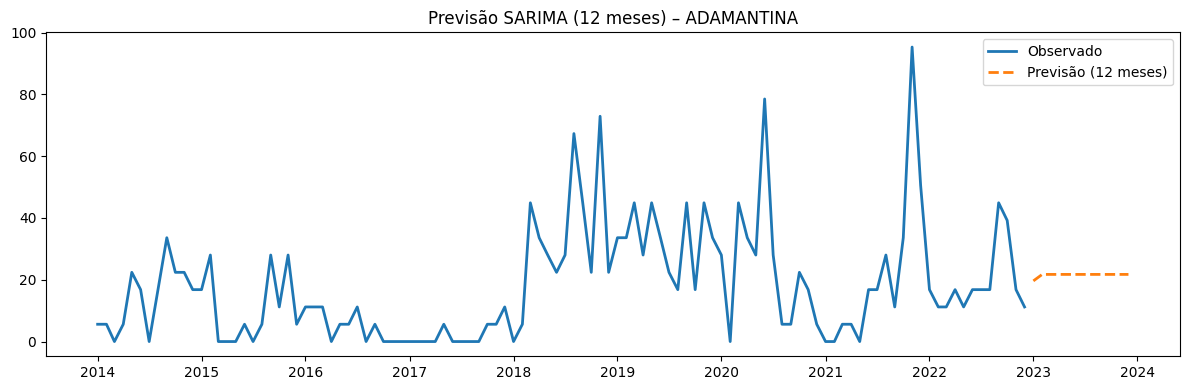

,PREV_TAXA_MENSAL
2023-01-01,19.627292
2023-02-01,21.728049
2023-03-01,21.728049
2023-04-01,21.728049
2023-05-01,21.728049
2023-06-01,21.728049
2023-07-01,21.728049
2023-08-01,21.728049
2023-09-01,21.728049
2023-10-01,21.728049


In [6]:
# Prever 12 meses à frente
n_periods = 12
prev_12 = modelo.predict(n_periods=n_periods)

# Criar índice de datas futuras
datas_futuras = pd.date_range(
    start=y.index[-1] + pd.offsets.MonthBegin(),
    periods=n_periods,
    freq='MS'
)

# DataFrame da previsão
df_prev = pd.DataFrame(
    {'PREV_TAXA_MENSAL': prev_12},
    index=datas_futuras
)

# Plot: histórico + previsão
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.title(f'Previsão SARIMA (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev


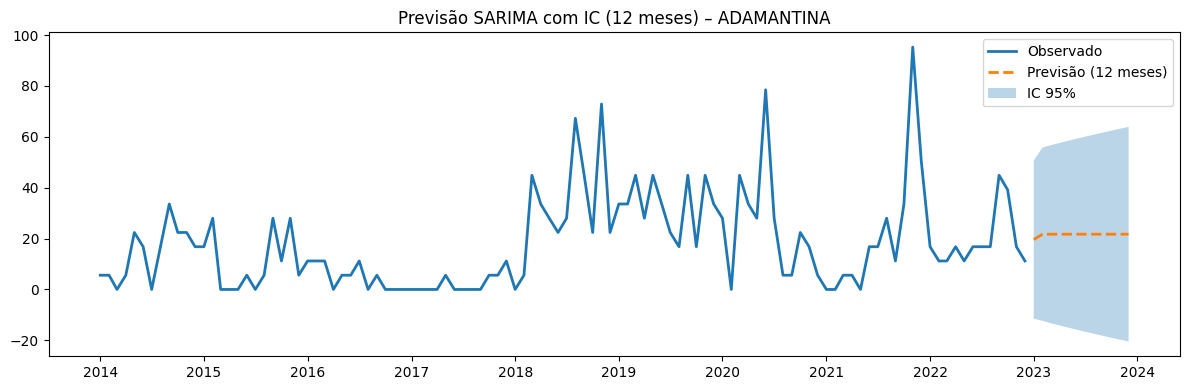

,PREV_TAXA_MENSAL,IC_INF,IC_SUP
2023-01-01,19.627292,-11.471441,50.726025
2023-02-01,21.728049,-12.335524,55.791623
2023-03-01,21.728049,-13.235869,56.691968
2023-04-01,21.728049,-14.113604,57.569703
2023-05-01,21.728049,-14.970352,58.426451
2023-06-01,21.728049,-15.807550,59.263648
2023-07-01,21.728049,-16.626478,60.082576
2023-08-01,21.728049,-17.428282,60.884381
2023-09-01,21.728049,-18.213994,61.670093
2023-10-01,21.728049,-18.984545,62.440644


In [7]:
# Previsão com intervalos de confiança (95%)
prev_12, ic_12 = modelo.predict(
    n_periods=12,
    return_conf_int=True,
    alpha=0.05
)

# DataFrame com previsão e IC
df_prev_ic = pd.DataFrame({
    'PREV_TAXA_MENSAL': prev_12,
    'IC_INF': ic_12[:, 0],
    'IC_SUP': ic_12[:, 1]
}, index=datas_futuras)

# Plot: histórico + previsão + IC
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev_ic['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.fill_between(
    df_prev_ic.index,
    df_prev_ic['IC_INF'],
    df_prev_ic['IC_SUP'],
    alpha=0.3,
    label='IC 95%'
)
plt.title(f'Previsão SARIMA com IC (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev_ic


In [8]:
import pmdarima as pm

y = df_mun['TAXA_MENSAL']  # sua série mensal com índice DATA

modelo = pm.auto_arima(
    y,
    seasonal=True, m=12,
    d=1, D=1,                 # força diferença regular e sazonal
    with_intercept=True,      # permite drift (tendência)
    stepwise=True,
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

print(modelo.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=890.234, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=859.381, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=888.275, Time=0.01 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=878.023, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=841.588, Time=0.55 sec
 ARIMA(1,1,0)(2,1,1)[12] intercept   : AIC=841.960, Time=0.85 sec
 ARIMA(1,1,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=849.308, Time=0.36 sec
 ARIMA(2,1,0)(2,1,0)[12] intercept   : AIC=832.632, Time=0.66 sec
 ARIMA(2,1,0)(1,1,0)[12] intercept   : AIC=848.711, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(2,1,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,0)(2,1,0)[12] intercept   : AIC=833.207, T